Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

Reading Dataset


In [2]:
df_tips = pd.read_csv('tips.csv')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Scatter Plot of Features v/s tip


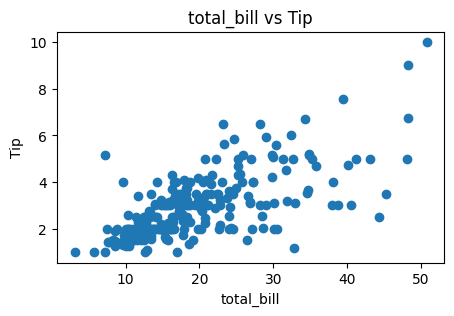

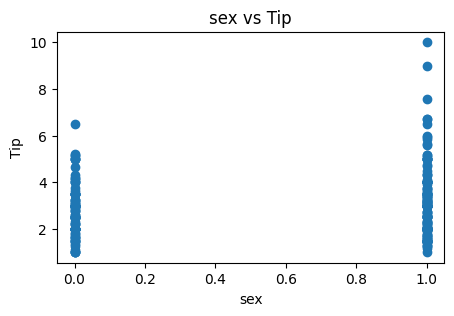

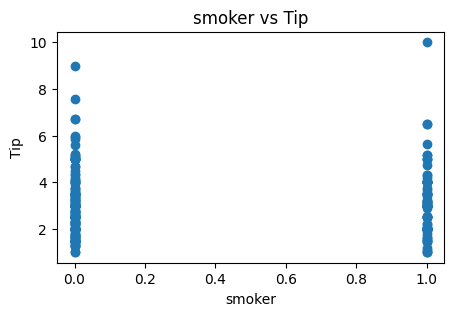

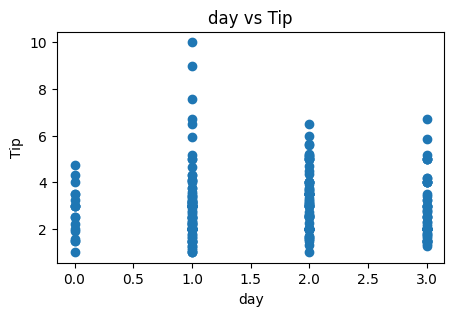

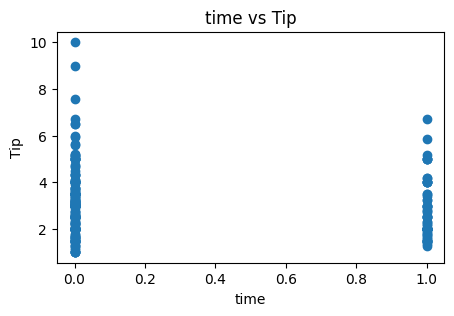

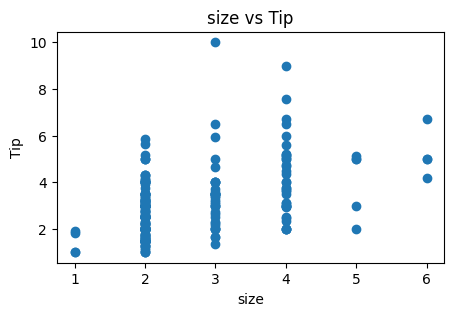

In [41]:
df_data = df_tips.drop(columns=['tip'])
df_target = df_tips['tip']
# Scatter Plot
for i in range(0,6):
    plt.figure(figsize=(5, 3))
    plt.scatter(df_data.iloc[:,i], df_target)
    plt.xlabel(df_data.columns[i])
    plt.ylabel('Tip')
    plt.title(df_data.columns[i] + ' vs Tip')
    plt.show()


### Insights
- It can be observed higher bill amount corresponds to higher tip amount.
- People tend to tip more at dinner time as compared to lunch time.
- The highest tips are observed on saturday with greater variance.
- The tip amounts on sunday are less varied but lower than saturdays.
- Lowest tip amounts are observed on fridays.
- Men tip more than Women do.
- Smokers and non-smokers tip about equally.

### Label Encoding datasets for training and analysis

In [8]:
label_encoder = LabelEncoder()
df_data['sex'] = label_encoder.fit_transform(df_tips['sex'])
df_data['smoker'] = label_encoder.fit_transform(df_tips['smoker'])
df_data['day'] = label_encoder.fit_transform(df_tips['day'])
df_data['time'] = label_encoder.fit_transform(df_tips['time'])
df_tips['sex'] = label_encoder.fit_transform(df_tips['sex'])
df_tips['smoker'] = label_encoder.fit_transform(df_tips['smoker'])
df_tips['day'] = label_encoder.fit_transform(df_tips['day'])
df_tips['time'] = label_encoder.fit_transform(df_tips['time'])

### Heatmap across features and target variable(Tip)

<Axes: >

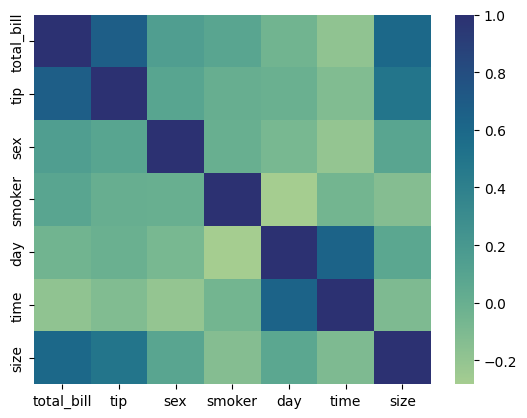

In [12]:
# Convert variable datatypes to get correlation matrix
df_corr = df_tips.copy()
corr = df_corr.corr()
sns.heatmap(corr,cmap="crest")

# Pairplots

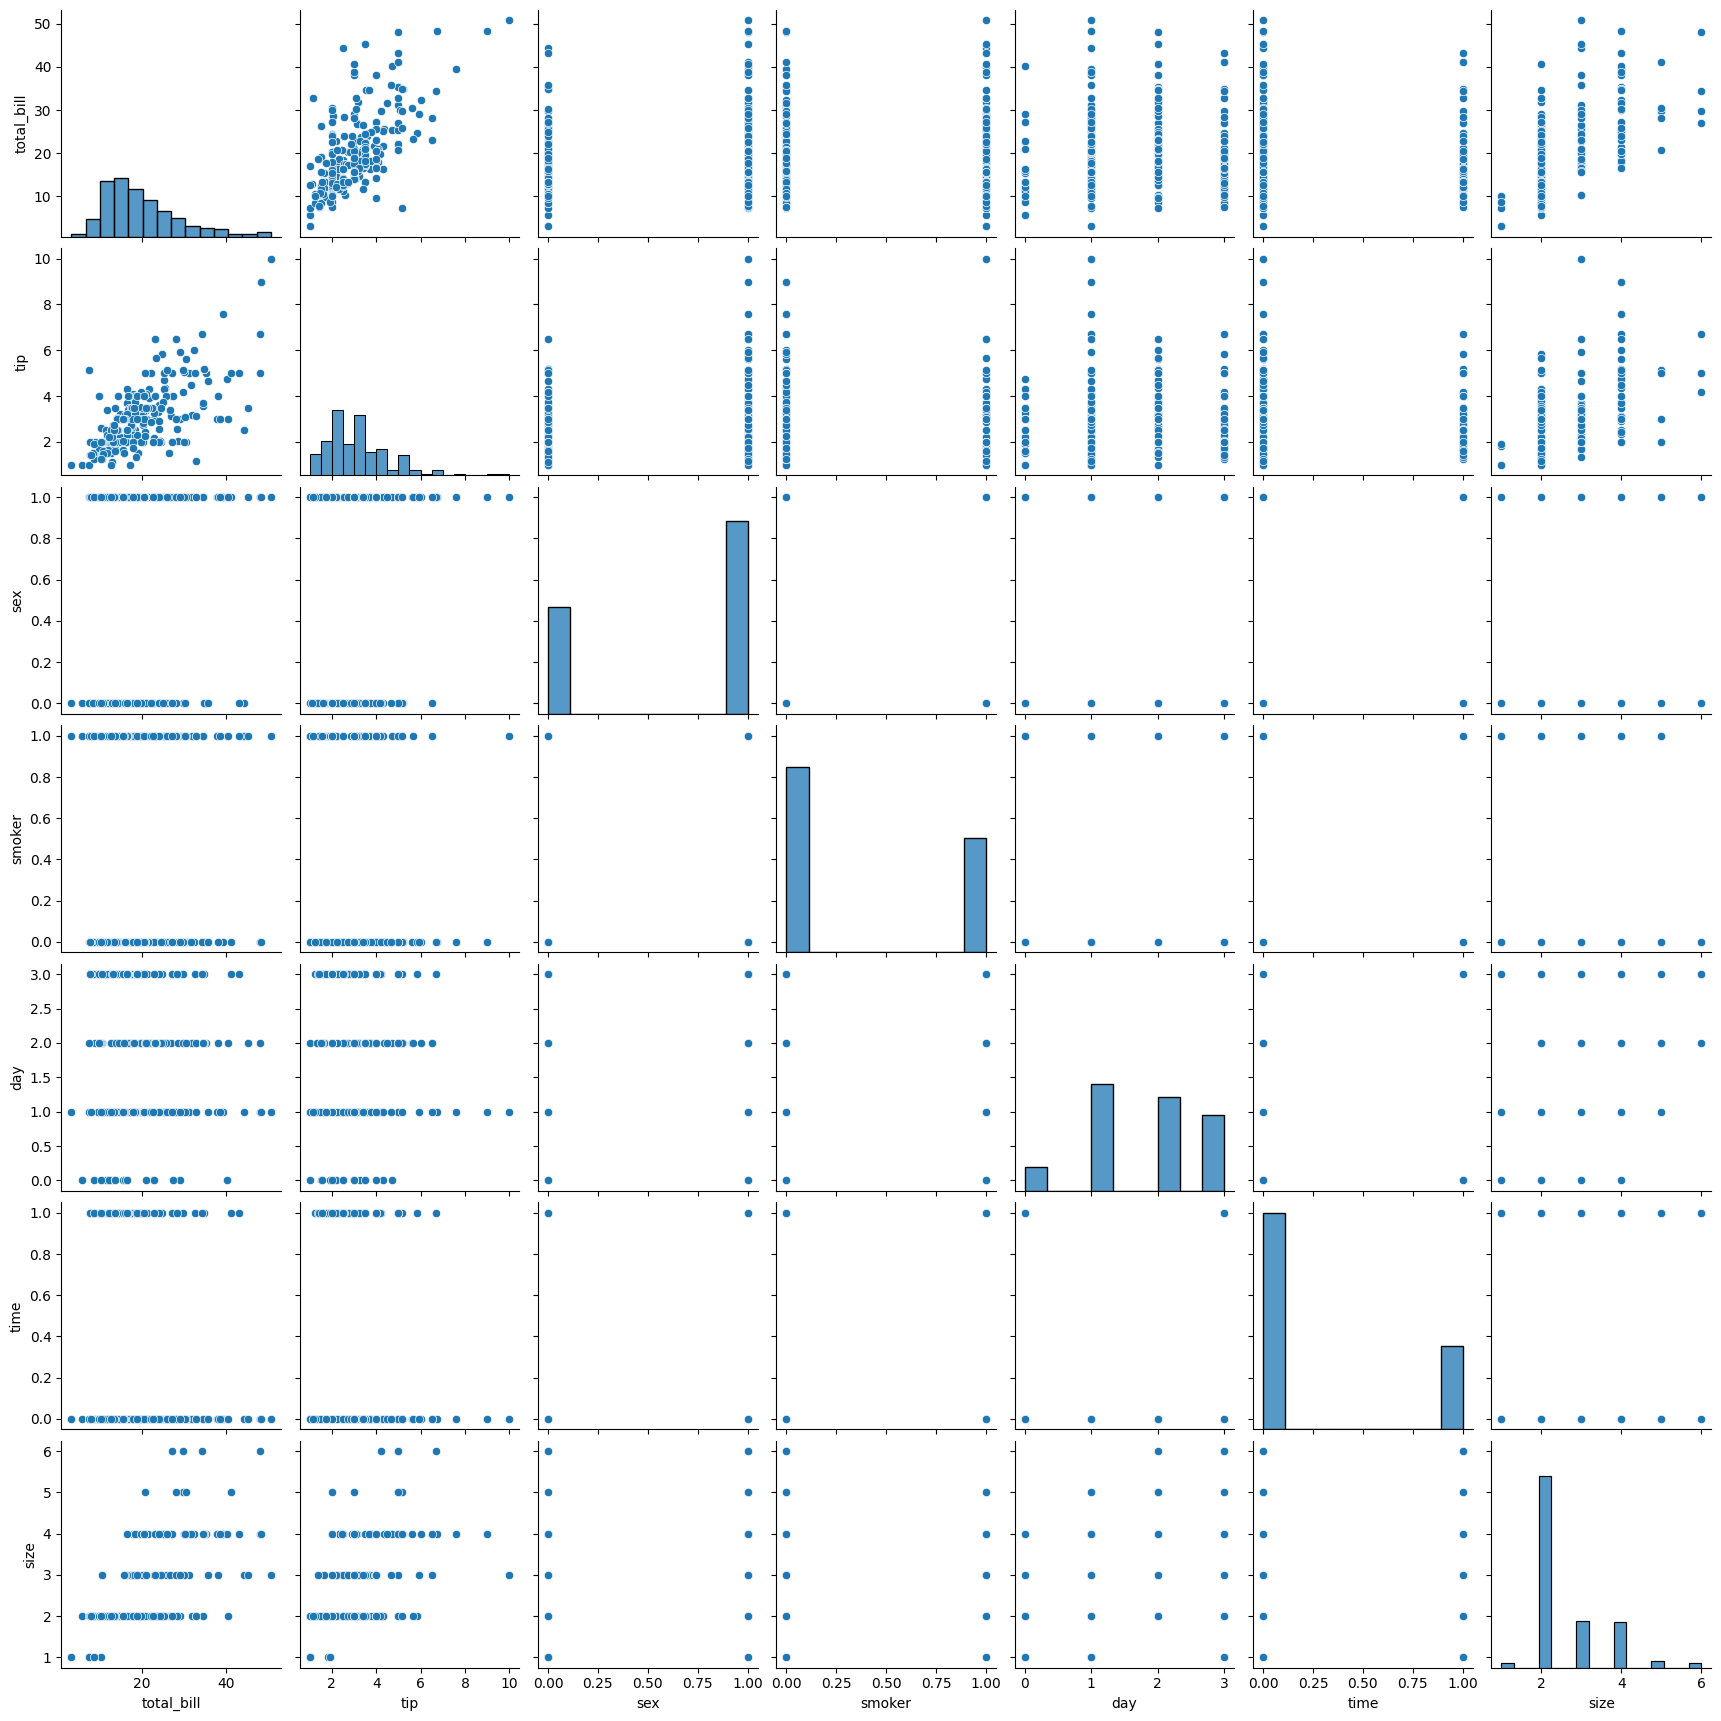

In [13]:
sns.pairplot(df_tips)

## Rainbow Test

In [17]:
import statsmodels.api as sm
# Define independent (X) and dependent (y) variables
X = df_data
X = sm.add_constant(X)
y = df_target
# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [19]:
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


#The Rainbow test helps decide if a linear model really fits, even if there might be some non-linear patterns in the data.
- In this test, the null hypothesis assumes the linear model is a solid fit.
- The alternative hypothesis suggests the linear model might not be capturing everything accurately.
- A p-value below a certain threshold (say 0.05) would lead us to reject the null, pointing to a possible non-linear model fit.
- If the p-value is above 0.05, we stick with the null hypothesis, which means the linear model seems appropriate.
- Here, since the p-value is greater than 0.05, we accept the null hypothesis, indicating that the linear model seems to fit well.

# Visualizing important features v/s average tip using lineplot.

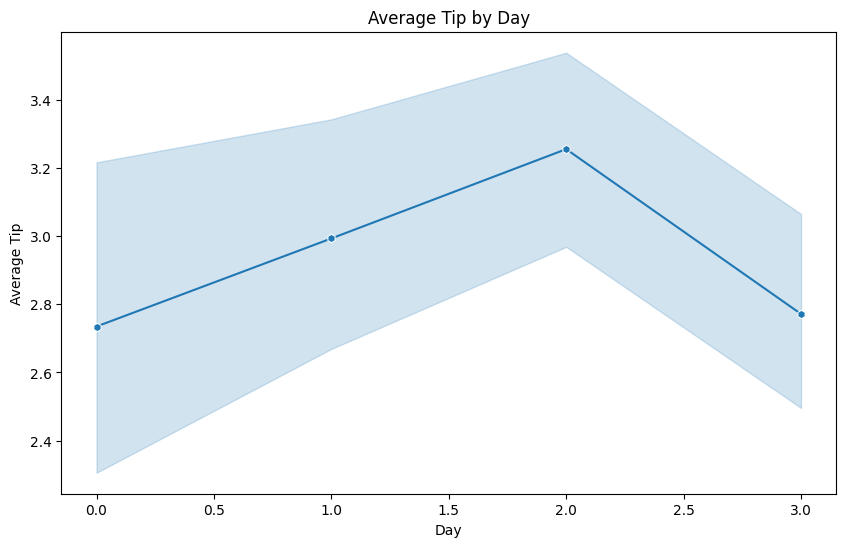

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tips, x="day", y="tip", estimator="mean", marker="h")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

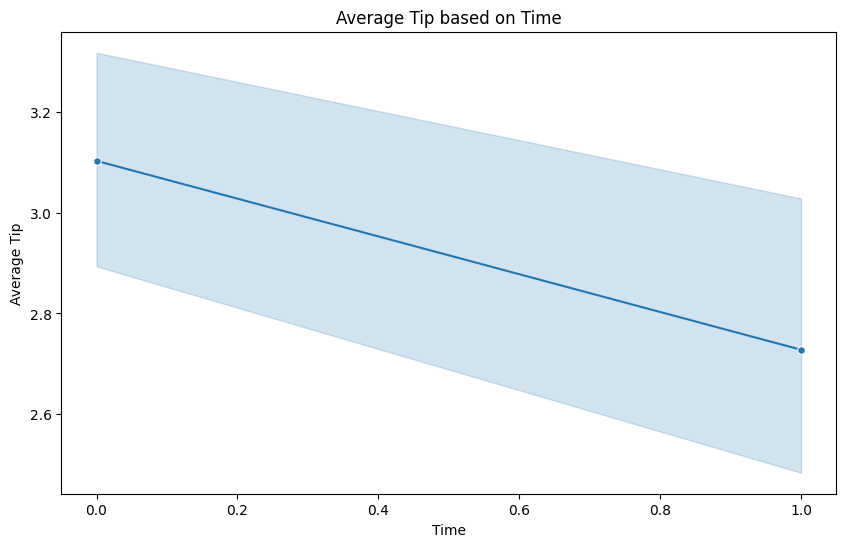

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tips, x="time", y="tip", estimator="mean", marker="h")
plt.title("Average Tip based on Time")
plt.xlabel("Time")
plt.ylabel("Average Tip")
plt.show()

In [62]:

X = df_tips.drop(columns='tip')
y = df_tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Evaluate model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression  Scores and Errors -\nMSE:", mse_lr, "\nR^2:", r2_lr, "\nRMSE:", np.sqrt(mse_lr))


Linear Regression  Scores and Errors -
MSE: 0.694812968628771 
R^2: 0.4441368826121932 
RMSE: 0.8335544185167343


In [64]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression  Scores and Errors -\nMSE:", mse_ridge, "\nR^2:", r2_ridge, "\nRMSE:", np.sqrt(mse_ridge))

Ridge Regression  Scores and Errors -
MSE: 0.6927491774762524 
R^2: 0.44578795338299404 
RMSE: 0.8323155516246542


In [65]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression  Scores and Errors -\nMSE:", mse_lasso, "\nR^2:", r2_lasso, "\nRMSE:", np.sqrt(mse_lasso))

Lasso Regression  Scores and Errors -
MSE: 0.5908528649971524 
R^2: 0.5273068720881755 
RMSE: 0.768669542129225


In [66]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluate model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree  Scores and Errors -\nMSE:", mse_tree, "\nR^2:", r2_tree, "\nRMSE:", np.sqrt(mse_tree))

Decision Tree  Scores and Errors -
MSE: 1.413408163265306 
R^2: -0.1307524517346701 
RMSE: 1.1888684381651764


In [67]:
forest = RandomForestRegressor(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Evaluate model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest  Scores and Errors -\nMSE:", mse_forest, "\nR^2:", r2_forest, "\nRMSE:", np.sqrt(mse_forest))


Random Forest  Scores and Errors -
MSE: 0.9625607446938791 
R^2: 0.2299337514142753 
RMSE: 0.9811018013916186


In [68]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression  Scores and Errors -\nMSE:", mse_svr, "\nR^2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))

Support Vector Regression  Scores and Errors -
MSE: 0.6840586858804613 
R^2: 0.45274050603842664 
RMSE: 0.827078403708174


In [69]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors  Scores and Errors -\nMSE:", mse_knn, "\nR^2:", r2_knn, "\nRMSE:", np.sqrt(mse_knn))


K-Nearest Neighbors  Scores and Errors -
MSE: 0.8382265306122448 
R^2: 0.3294034029001649 
RMSE: 0.9155471209130881


### Residual Plotting for all models

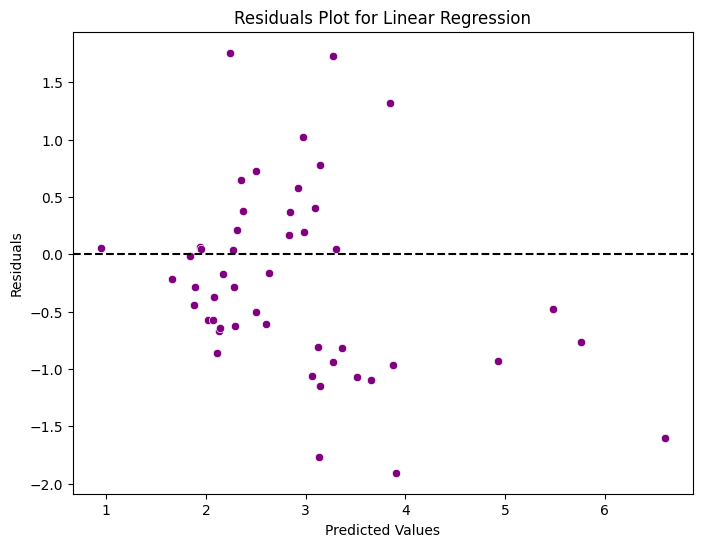

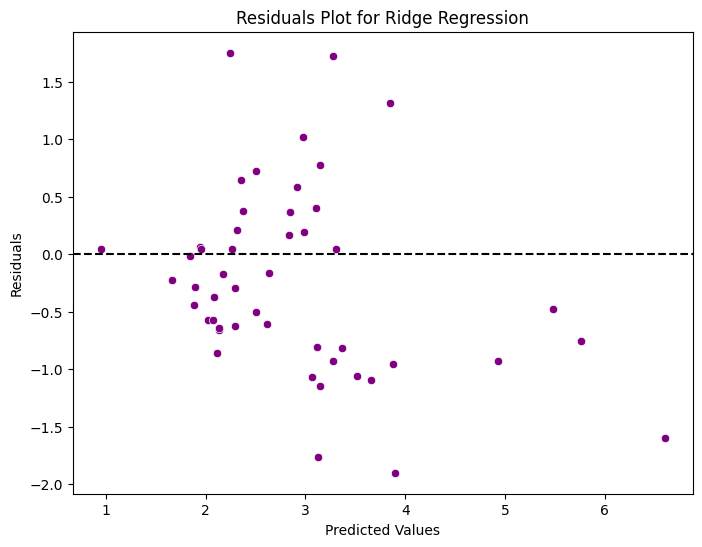

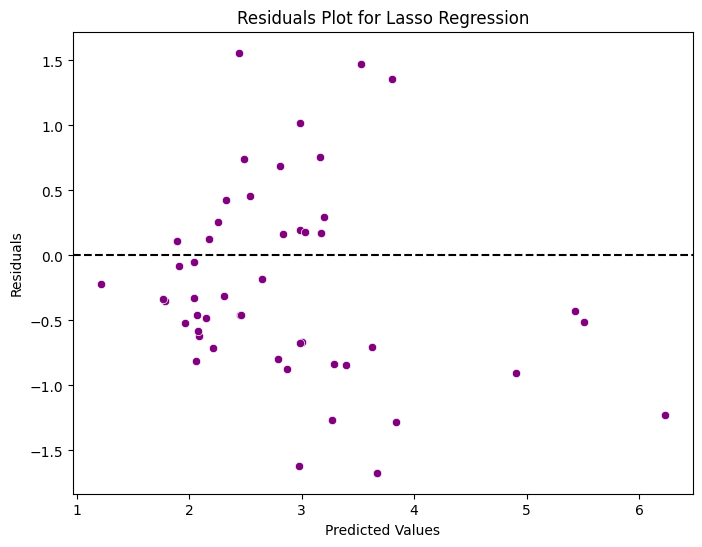

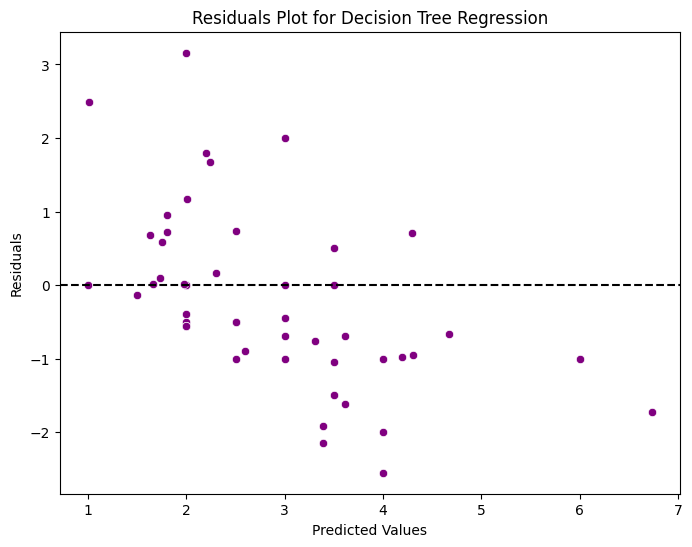

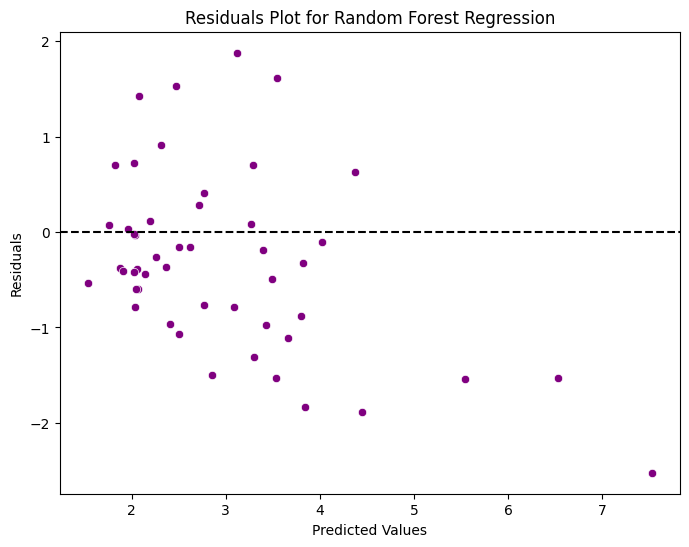

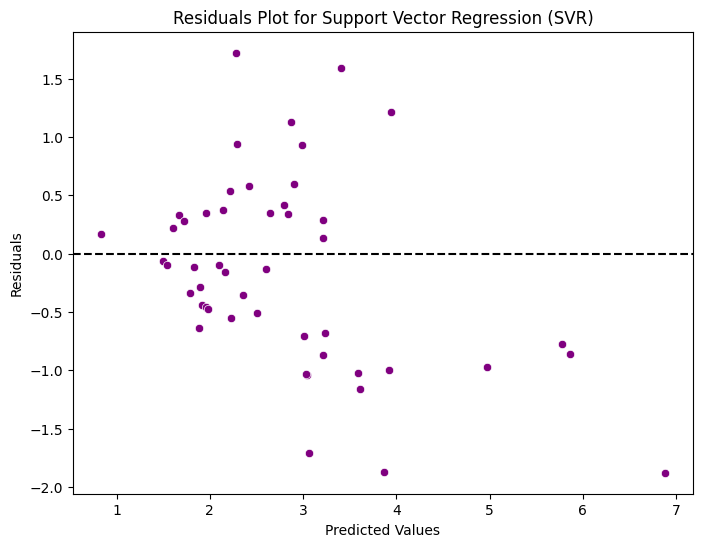

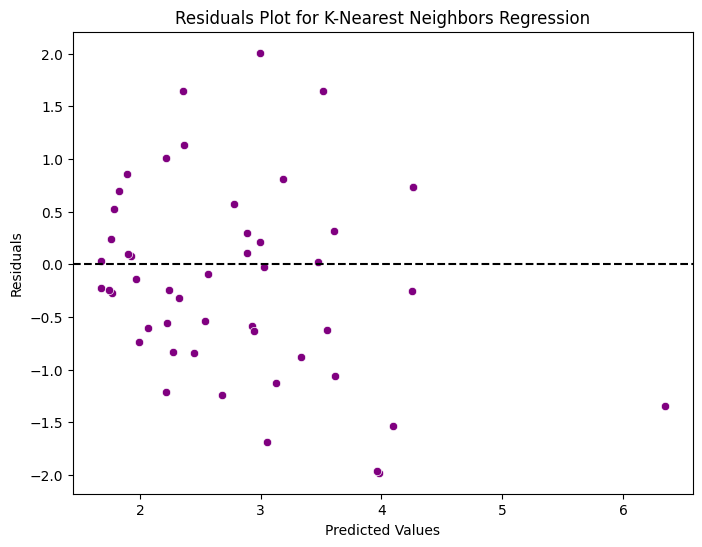

In [77]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals,color = "purple")
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_lr = lin_reg.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")


# Final Verdict
- Sundays are a great day to provide top-notch service, as it’s likely to boost tips, and improving service quality on Fridays could lead to higher tip rates too.
- Dinner hours should get special attention since customers tend to tip more during this time.
- Tables with more people should be prioritized, as they’re more likely to leave larger tips.
- Lastly, keeping an eye on the total bill is important since it strongly correlates with the tip amount.